In [2]:
%pip install scikeras

In [3]:
# import the packages
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# train_images = rgb2gray(train_images).reshape(50000,32,32,1)
# test_images = rgb2gray(test_images).reshape(10000,32,32,1)
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels  = to_categorical(val_labels)

print(train_images.shape)
print(val_images.shape)

170498071/170498071 [==============================] - 3s 0us/step
(40000, 32, 32, 3)
(10000, 32, 32, 3)


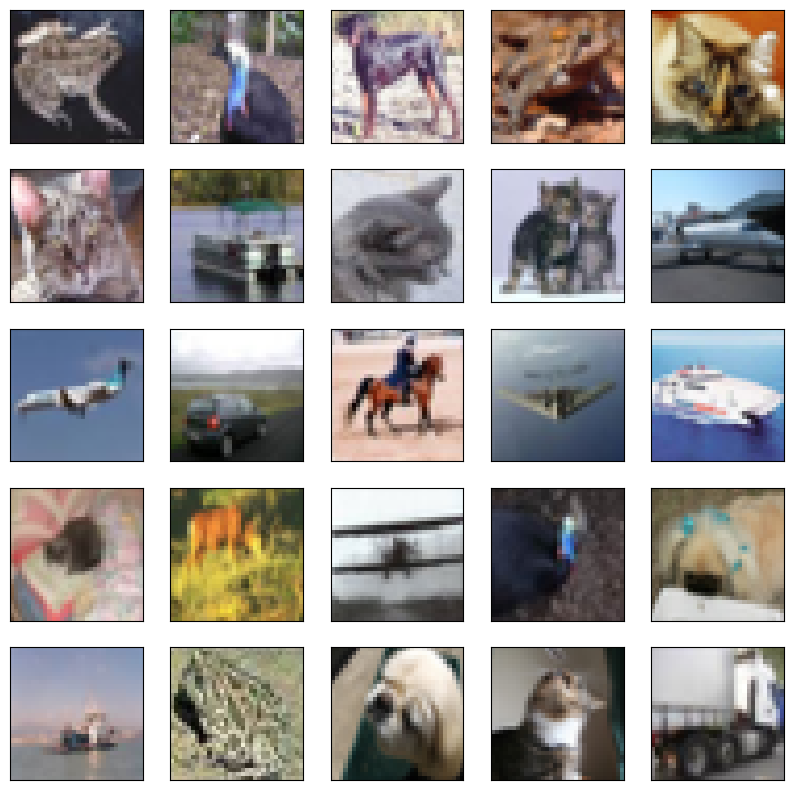

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    # plt.xlabel(class_names[train_labels[i][0]])
plt.show()

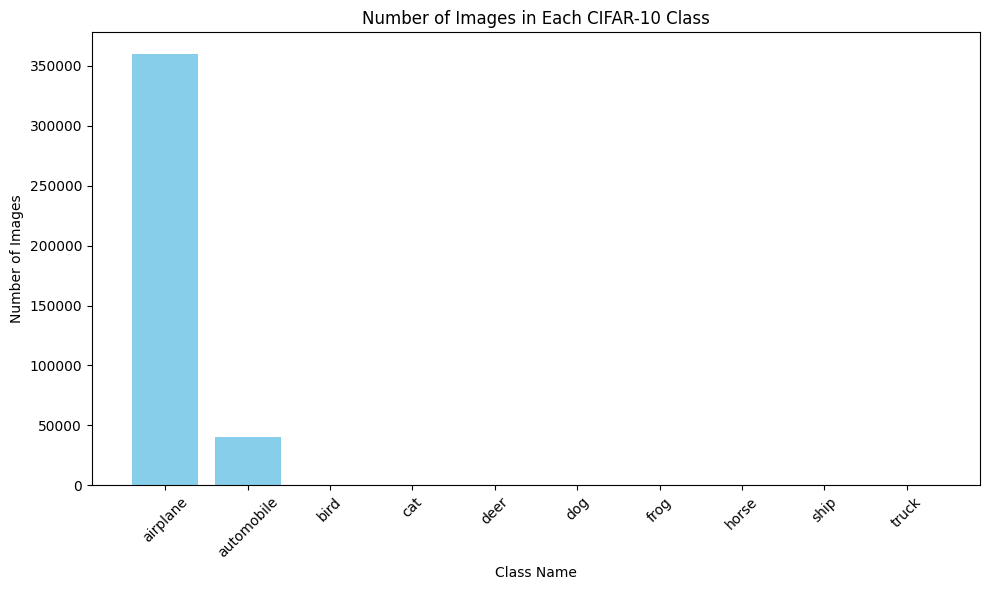

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a dictionary to count the number of images in each class
class_counts = {}
for i in range(10):
    class_counts[class_names[i]] = len(train_labels[train_labels == i])

# Extract class names and counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each CIFAR-10 Class')
plt.xticks(rotation=45)
plt.tight_layout()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels), verbose=1)


Epoch 1/10
223/625 [=========>....................] - ETA: 1:53 - loss: 2.0935 - accuracy: 0.2203

KeyboardInterrupt: ignored

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10))

In [28]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 2, 2, 64)        

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))

Epoch 1/30
1250/1250 [==============================] - 10s 6ms/step - loss: 1.7786 - accuracy: 0.3322 - val_loss: 1.5016 - val_accuracy: 0.4550
Epoch 2/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3957 - accuracy: 0.4936 - val_loss: 1.2537 - val_accuracy: 0.5469
Epoch 3/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2538 - accuracy: 0.5522 - val_loss: 1.2105 - val_accuracy: 0.5703
Epoch 4/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1554 - accuracy: 0.5907 - val_loss: 1.1294 - val_accuracy: 0.5973
Epoch 5/30
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0823 - accuracy: 0.6197 - val_loss: 1.0806 - val_accuracy: 0.6221
Epoch 6/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0231 - accuracy: 0.6447 - val_loss: 1.1364 - val_accuracy: 0.6105
Epoch 7/30
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9695 - accuracy: 0.6618 - val_loss: 1.0465 - val_accuracy

313/313 - 1s - loss: 1.2150 - accuracy: 0.6803 - 765ms/epoch - 2ms/step


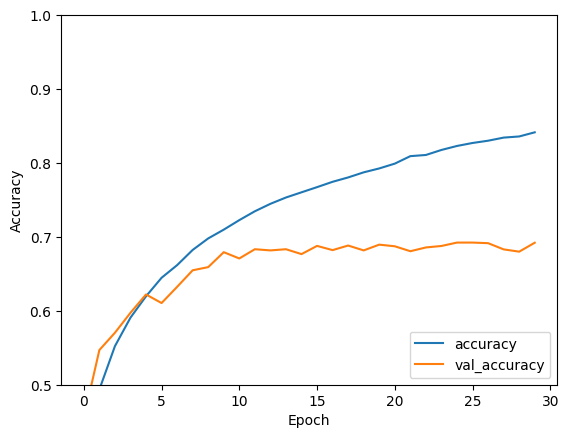

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [31]:
print(test_acc)

0.6802999973297119


## hyper parameter tuning

In [9]:
def create_model(optimizer='adam', dropout_rate=0.25):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  # model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  # model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  # model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(10, activation='softmax'))
  # compile model
  # opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(val_images, val_labels), verbose=1)
  return model

In [10]:
model2 = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=1,dropout_rate=0.25)

# Define hyperparameters for random search
param_dist = {
    'optimizer': ['adam', SGD(lr=0.001, momentum=0.9)],
    'dropout_rate': [0.3, 0.5,0.2]
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model2, param_distributions=param_dist, n_iter=2, cv=2)
random_result = random_search.fit(train_images, train_labels,validation_data=(val_images, val_labels))

# Print the best parameters and corresponding accuracy
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
625/625 [==============================] - 9s 11ms/step - loss: 1.8369 - accuracy: 0.3169 - val_loss: 1.4778 - val_accuracy: 0.4525
Epoch 2/20
625/625 [==============================] - 8s 13ms/step - loss: 1.4034 - accuracy: 0.4870 - val_loss: 1.2149 - val_accuracy: 0.5651
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 1.2024 - accuracy: 0.5722 - val_loss: 0.9994 - val_accuracy: 0.6431
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0606 - accuracy: 0.6272 - val_loss: 0.9319 - val_accuracy: 0.6701
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 0.9618 - accuracy: 0.6620 - val_loss: 0.8297 - val_accuracy: 0.7054
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 0.8981 - accuracy: 0.6845 - val_loss: 0.7821 - val_accuracy: 0.7237
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8372 - accuracy: 0.7070 - val_loss: 0.7804 - val_accuracy: 0.7235

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
625/625 [==============================] - 9s 11ms/step - loss: 1.8106 - accuracy: 0.3235 - val_loss: 1.3975 - val_accuracy: 0.4885
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 1.4104 - accuracy: 0.4854 - val_loss: 1.1945 - val_accuracy: 0.5710
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 1.2200 - accuracy: 0.5615 - val_loss: 1.0386 - val_accuracy: 0.6290
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0909 - accuracy: 0.6150 - val_loss: 0.8970 - val_accuracy: 0.6789
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 0.9814 - accuracy: 0.6543 - val_loss: 0.8616 - val_accuracy: 0.6950
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 0.9016 - accuracy: 0.6875 - val_loss: 0.8124 - val_accuracy: 0.7146
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8394 - accuracy: 0.7101 - val_loss: 0.7835 - val_accuracy: 0.7204

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
625/625 [==============================] - 9s 11ms/step - loss: 1.6972 - accuracy: 0.3730 - val_loss: 1.2905 - val_accuracy: 0.5351
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 1.2292 - accuracy: 0.5569 - val_loss: 1.0584 - val_accuracy: 0.6199
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0243 - accuracy: 0.6372 - val_loss: 0.8778 - val_accuracy: 0.6879
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.8928 - accuracy: 0.6863 - val_loss: 0.8062 - val_accuracy: 0.7119
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8040 - accuracy: 0.7162 - val_loss: 0.7622 - val_accuracy: 0.7278
Epoch 6/20
625/625 [==============================] - 7s 12ms/step - loss: 0.7270 - accuracy: 0.7436 - val_loss: 0.7061 - val_accuracy: 0.7489
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.6798 - accuracy: 0.7618 - val_loss: 0.7340 - val_accuracy: 0.7424

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
625/625 [==============================] - 10s 12ms/step - loss: 1.7062 - accuracy: 0.3713 - val_loss: 1.2461 - val_accuracy: 0.5489
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 1.2036 - accuracy: 0.5665 - val_loss: 0.9923 - val_accuracy: 0.6522
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 0.9855 - accuracy: 0.6506 - val_loss: 0.8920 - val_accuracy: 0.6845
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8633 - accuracy: 0.6963 - val_loss: 0.7748 - val_accuracy: 0.7305
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 0.7797 - accuracy: 0.7270 - val_loss: 0.7034 - val_accuracy: 0.7510
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 0.7102 - accuracy: 0.7531 - val_loss: 0.6816 - val_accuracy: 0.7617
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.6601 - accuracy: 0.7695 - val_loss: 0.6585 - val_accuracy: 0.775

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
625/625 [==============================] - 9s 11ms/step - loss: 1.7612 - accuracy: 0.3495 - val_loss: 1.3913 - val_accuracy: 0.5209
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 1.2725 - accuracy: 0.5428 - val_loss: 1.0325 - val_accuracy: 0.6299
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0383 - accuracy: 0.6350 - val_loss: 0.8655 - val_accuracy: 0.6865
Epoch 4/20
625/625 [==============================] - 7s 10ms/step - loss: 0.8973 - accuracy: 0.6860 - val_loss: 0.7829 - val_accuracy: 0.7247
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8106 - accuracy: 0.7166 - val_loss: 0.7358 - val_accuracy: 0.7423
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 0.7392 - accuracy: 0.7419 - val_loss: 0.7240 - val_accuracy: 0.7530
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.6882 - accuracy: 0.7584 - val_loss: 0.6716 - val_accuracy: 0.7659

In [14]:
model = create_model(SGD(lr=0.001, momentum=0.9),0.2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/20
625/625 [==============================] - 9s 11ms/step - loss: 1.8452 - accuracy: 0.3152 - val_loss: 1.5347 - val_accuracy: 0.4432
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 1.4595 - accuracy: 0.4642 - val_loss: 1.2419 - val_accuracy: 0.5589
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 1.2524 - accuracy: 0.5506 - val_loss: 1.0532 - val_accuracy: 0.6210
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 1.0829 - accuracy: 0.6150 - val_loss: 0.9030 - val_accuracy: 0.6749
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.9843 - accuracy: 0.6527 - val_loss: 0.8825 - val_accuracy: 0.6923
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 0.9104 - accuracy: 0.6786 - val_loss: 0.8394 - val_accuracy: 0.7003
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.8436 - accuracy: 0.7041 - val_loss: 0.7517 - val_accuracy: 0.7346
E

In [13]:
print(test_acc)

0.7785999774932861


## using pretrained model


In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load CIFAR-10 data
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Preprocess the data
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# Load pre-trained MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Create a new model and add the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on CIFAR-10 data
model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY))

# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

9406464/9406464 [==============================] - 1s 0us/step


Epoch 1/5
1563/1563 [==============================] - 78s 34ms/step - loss: 1.2964 - accuracy: 0.5599 - val_loss: 1.6450 - val_accuracy: 0.4869
Epoch 2/5
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9535 - accuracy: 0.6830 - val_loss: 1.4766 - val_accuracy: 0.5615
Epoch 3/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9128 - accuracy: 0.6916 - val_loss: 2.9380 - val_accuracy: 0.3276
Epoch 4/5
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8394 - accuracy: 0.7206 - val_loss: 1.0376 - val_accuracy: 0.7082
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.9634 - accuracy: 0.7184
Test Loss: 0.9634369015693665, Test Accuracy: 0.7184000015258789


### online model


In [ ]:

from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()